# UTS Model Deployment

Nama : Melvern Amadio Hidyat

NIM : 2602072685

Jurusan : Data Science

In [3]:
#Dataset A NIM : Ganjil & pria (2602072685)
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Data A.csv')
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67,3,0.00,2,1,1,114514.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,41253,52916,15756850,Hsieh,683.0,Germany,Female,29,9,125552.82,1,1,0,173948.30,1
41254,41254,22343,15714355,Hsing,610.0,Germany,Female,39,6,111760.40,2,1,0,120135.62,0
41255,41255,80083,15578098,Jamieson,600.0,France,Male,31,3,0.00,2,1,1,121555.51,0
41256,41256,79853,15682467,Ts'ui,648.0,Spain,Female,46,1,0.00,1,1,1,170528.63,0


In [5]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67,3,0.00,2,1,1,114514.92,0


In [6]:
df.shape

(41258, 15)

In [7]:
df.info()
#Ada missing Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  int64  
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 4.7+ MB


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [9]:
df.churn.value_counts()

churn
0    32645
1     8613
Name: count, dtype: int64

## Data Spliting

In [10]:
input_df=df.drop(['Unnamed: 0','Surname','churn','id','CustomerId'],axis=1)
output_df=df['churn']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [12]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,634.0,France,Male,53,2,181821.96,2,1,1,36980.54
6996,581.0,France,Female,50,9,117565.03,2,0,0,82559.77
30824,545.0,France,Male,34,9,0.00,2,1,0,66393.89
40019,543.0,Spain,Male,26,10,117837.43,1,1,0,160528.65
21501,733.0,Spain,Male,48,9,0.00,1,1,0,127569.80


In [13]:
y_train.head()

15731    0
6996     0
30824    0
40019    0
21501    0
Name: churn, dtype: int64

# Handle Missing Value

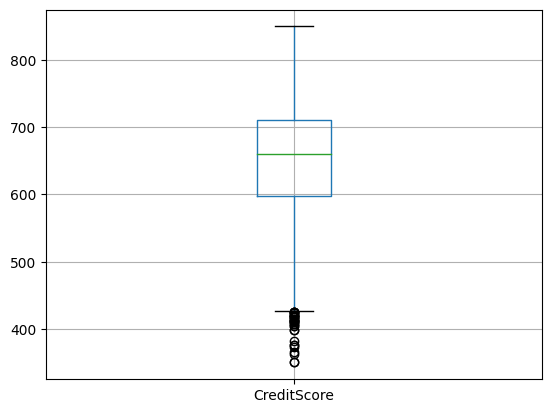

In [14]:
boxplot = x_train.boxplot(column=['CreditScore'])
plt.show()

In [15]:
#Ganti data missing value dengan Mean
print(np.mean(x_train['CreditScore']))
#Ganti data missing value dengan Mean
print(np.mean(x_test['CreditScore']))

656.9573836081474
658.2338103322824


In [16]:
x_train['CreditScore'].fillna(657, inplace=True)

In [17]:
x_test['CreditScore'].fillna(658.2, inplace=True)

In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33006 entries, 15731 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33006 non-null  float64
 1   Geography        33006 non-null  object 
 2   Gender           33006 non-null  object 
 3   Age              33006 non-null  int64  
 4   Tenure           33006 non-null  int64  
 5   Balance          33006 non-null  float64
 6   NumOfProducts    33006 non-null  int64  
 7   HasCrCard        33006 non-null  int64  
 8   IsActiveMember   33006 non-null  int64  
 9   EstimatedSalary  33006 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ MB


In [19]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8252 entries, 22930 to 28660
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8252 non-null   float64
 1   Geography        8252 non-null   object 
 2   Gender           8252 non-null   object 
 3   Age              8252 non-null   int64  
 4   Tenure           8252 non-null   int64  
 5   Balance          8252 non-null   float64
 6   NumOfProducts    8252 non-null   int64  
 7   HasCrCard        8252 non-null   int64  
 8   IsActiveMember   8252 non-null   int64  
 9   EstimatedSalary  8252 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 709.2+ KB


## Encoding Categorical Data

In [20]:
df.Gender.value_counts()

Gender
Male      23341
Female    17917
Name: count, dtype: int64

In [21]:
x_train_encode= {"Gender": {"Male":0,"Female" :1}}
x_train=x_train.replace(x_train_encode)
x_test=x_test.replace(x_train_encode)

In [22]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,634.0,France,0,53,2,181821.96,2,1,1,36980.54
6996,581.0,France,1,50,9,117565.03,2,0,0,82559.77
30824,545.0,France,0,34,9,0.00,2,1,0,66393.89
40019,543.0,Spain,0,26,10,117837.43,1,1,0,160528.65
21501,733.0,Spain,0,48,9,0.00,1,1,0,127569.80


In [23]:
x_train_encode

{'Gender': {'Male': 0, 'Female': 1}}

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  int64  
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 4.7+ MB


In [25]:
filename = 'gender_encoded.pkl'
pkl.dump(x_train_encode, open(filename, 'wb'))

In [26]:
#One Hot Encode
from sklearn.preprocessing import OneHotEncoder

subs_enc_train=x_train[['Geography']]
cont_enc_train=x_train[['Geography']]

subs_enc_test=x_test[['Geography']]
cont_enc_test=x_test[['Geography']]

train_encoded_subs=OneHotEncoder()
train_encoded_cont=OneHotEncoder()

subs_enc_train=pd.DataFrame(train_encoded_subs.fit_transform(subs_enc_train).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_train=pd.DataFrame(train_encoded_cont.fit_transform(cont_enc_train).toarray(),columns=train_encoded_cont.get_feature_names_out())

subs_enc_test=pd.DataFrame(train_encoded_subs.transform(subs_enc_test).toarray(),columns=train_encoded_subs.get_feature_names_out())
cont_enc_test=pd.DataFrame(train_encoded_cont.transform(cont_enc_test).toarray(),columns=train_encoded_cont.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,subs_enc_train,cont_enc_train], axis=1)
x_test_enc=pd.concat([x_test,subs_enc_test,cont_enc_test], axis=1)

In [27]:
train_encoded_cont.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [28]:
train_encoded_subs.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [29]:
filename_subs = 'OHC_encoded_subs.pkl'
pkl.dump(train_encoded_subs, open(filename_subs, 'wb'))

filename_subs = 'OHC_encoded_cont.pkl'
pkl.dump(train_encoded_cont, open(filename_subs, 'wb'))

In [30]:
x_train_enc

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_France,Geography_Germany,Geography_Spain
0,15731,634.0,France,0,53,2,181821.96,2,1,1,36980.54,1.0,0.0,0.0,1.0,0.0,0.0
1,6996,581.0,France,1,50,9,117565.03,2,0,0,82559.77,1.0,0.0,0.0,1.0,0.0,0.0
2,30824,545.0,France,0,34,9,0.00,2,1,0,66393.89,1.0,0.0,0.0,1.0,0.0,0.0
3,40019,543.0,Spain,0,26,10,117837.43,1,1,0,160528.65,0.0,0.0,1.0,0.0,0.0,1.0
4,21501,733.0,Spain,0,48,9,0.00,1,1,0,127569.80,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33001,6265,850.0,Germany,1,43,2,102741.15,1,0,1,23974.85,0.0,1.0,0.0,0.0,1.0,0.0
33002,11284,724.0,Spain,0,39,3,83161.65,1,1,1,116885.59,0.0,0.0,1.0,0.0,0.0,1.0
33003,38158,571.0,France,0,34,5,141784.02,1,1,0,134871.12,1.0,0.0,0.0,1.0,0.0,0.0
33004,860,701.0,Germany,1,28,5,186101.18,2,1,1,76611.33,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
x_test_enc

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_France,Geography_Germany,Geography_Spain
0,22930,721.0,France,1,26,8,0.00,2,1,0,46635.21,1.0,0.0,0.0,1.0,0.0,0.0
1,4280,710.0,France,1,46,7,0.00,1,0,0,120591.01,1.0,0.0,0.0,1.0,0.0,0.0
2,40587,628.0,Germany,1,31,3,117020.08,2,1,0,49637.65,0.0,1.0,0.0,0.0,1.0,0.0
3,31318,646.0,Spain,1,34,9,0.00,2,1,0,117023.08,0.0,0.0,1.0,0.0,0.0,1.0
4,34854,694.0,France,0,46,0,91956.49,1,1,0,59961.81,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,3493,749.0,France,0,75,6,75381.15,2,1,1,199727.72,1.0,0.0,0.0,1.0,0.0,0.0
8248,17255,653.0,Spain,1,35,4,0.00,2,1,1,164806.89,0.0,0.0,1.0,0.0,0.0,1.0
8249,24735,552.0,Spain,1,42,6,0.00,1,1,0,195692.30,0.0,0.0,1.0,0.0,0.0,1.0
8250,4036,543.0,Spain,0,26,7,0.00,2,1,1,144849.10,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
x_train_enc.columns

Index(['index', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [33]:
#Determine model feature
x_train_enc=x_train_enc.drop(['index','Geography'],axis=1)

In [34]:
x_train_enc

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_France,Geography_Germany,Geography_Spain
0,634.0,0,53,2,181821.96,2,1,1,36980.54,1.0,0.0,0.0,1.0,0.0,0.0
1,581.0,1,50,9,117565.03,2,0,0,82559.77,1.0,0.0,0.0,1.0,0.0,0.0
2,545.0,0,34,9,0.00,2,1,0,66393.89,1.0,0.0,0.0,1.0,0.0,0.0
3,543.0,0,26,10,117837.43,1,1,0,160528.65,0.0,0.0,1.0,0.0,0.0,1.0
4,733.0,0,48,9,0.00,1,1,0,127569.80,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33001,850.0,1,43,2,102741.15,1,0,1,23974.85,0.0,1.0,0.0,0.0,1.0,0.0
33002,724.0,0,39,3,83161.65,1,1,1,116885.59,0.0,0.0,1.0,0.0,0.0,1.0
33003,571.0,0,34,5,141784.02,1,1,0,134871.12,1.0,0.0,0.0,1.0,0.0,0.0
33004,701.0,1,28,5,186101.18,2,1,1,76611.33,0.0,1.0,0.0,0.0,1.0,0.0


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [36]:
x_test_enc=x_test_enc.drop(['index','Geography'],axis=1)

In [37]:
y_predict=RF_class.predict(x_test_enc)

In [38]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.84      0.99      0.90      6545
           0       0.83      0.26      0.39      1707

    accuracy                           0.84      8252
   macro avg       0.83      0.62      0.65      8252
weighted avg       0.83      0.84      0.80      8252



In [39]:
filename = 'RF_churn.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

# XGBoost

In [40]:
xgb_train_enc = x_train_enc.iloc[:,12]

In [41]:
xgb_test_enc = x_test_enc.iloc[:,12]

In [42]:
import xgboost as xgb

XGB_Class = xgb.XGBClassifier(tree_method="hist")
XGB_Class.fit(xgb_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_predict=XGB_Class.predict(xgb_test_enc)

In [44]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.79      1.00      0.88      6545
           0       0.00      0.00      0.00      1707

    accuracy                           0.79      8252
   macro avg       0.40      0.50      0.44      8252
weighted avg       0.63      0.79      0.70      8252



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
filename = 'XGB_churn.pkl'
pkl.dump(XGB_Class, open(filename, 'wb'))

## Feature check

In [46]:
df['Tenure'].describe()

count    41258.000000
mean         5.020408
std          2.798614
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [47]:
df['Balance'].describe()

count     41258.000000
mean      55845.162728
std       62912.415027
min           0.000000
25%           0.000000
50%           0.000000
75%      120139.762500
max      238387.560000
Name: Balance, dtype: float64

In [48]:
df['EstimatedSalary'].describe()

count     41258.000000
mean     112741.993562
std       50293.991764
min          11.580000
25%       74838.207500
50%      118711.750000
75%      155642.645000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [49]:
df['CreditScore'].describe()

count    41238.000000
mean       657.212619
std         80.324627
min        350.000000
25%        598.000000
50%        661.000000
75%        711.000000
max        850.000000
Name: CreditScore, dtype: float64

In [50]:
from sklearn.metrics import accuracy_score

RF_model = pkl.load(open('RF_churn.pkl', 'rb'))
XGB_model = pkl.load(open('XGB_churn.pkl', 'rb'))

# Make predictions on the test data
RF_predictions = RF_model.predict(x_test_enc)
XGB_predictions = XGB_model.predict(xgb_test_enc)

# Calculate the accuracy of each model
RF_accuracy = accuracy_score(y_test, RF_predictions)
XGB_accuracy = accuracy_score(y_test, XGB_predictions)

# Compare the accuracies
if RF_accuracy > XGB_accuracy:
    best_model = 'Random Forest'
    best_accuracy = RF_accuracy
else:
    best_model = 'XGBoost'
    best_accuracy = XGB_accuracy

# Print the best model and its accuracy
print(f'The best model is {best_model} with an accuracy of {best_accuracy:.2f}')

The best model is Random Forest with an accuracy of 0.84
